In [107]:
from datetime import datetime
import json

import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [108]:
united = pd.read_csv('united_3.csv')
train=united[united['test']==0]
train.reset_index(drop=True)
test=united[united['test']==1]
test.reset_index(drop=True)

,test,style,body,color,fuel,model_date,doors,production_date,transmission,engine_displacement,engine_power,mileage,drive_type,wheel,condition,owners,vehicle_title,features,price,tax,tax_per_horse,days_in_use,mileage_per_day
0,1,520d,седан,чёрный,дизель,2016,4,2017,автоматическая,2.0,190,158836.0,задний,Левый,Не требует ремонта,1,Оригинал,"'Антипробуксовочная система (ASR)', 'Система с...",0.0,9500.0,50,1300,122.181538
1,1,318d,седан,белый,дизель,2018,4,2019,автоматическая,2.0,150,10.0,задний,Левый,Не требует ремонта,1,Оригинал,"'Круиз-контроль', 'Мультифункциональное рулево...",0.0,5250.0,35,570,0.017544
2,1,550i xDrive,седан,синий,бензин,2009,4,2012,автоматическая,4.4,407,120000.0,полный,Левый,Не требует ремонта,2,Оригинал,"'Круиз-контроль', 'Мультифункциональное рулево...",0.0,61050.0,150,3127,38.375440
3,1,30d,внедорожник,белый,дизель,2014,5,2015,автоматическая,3.0,249,111466.0,полный,Левый,Не требует ремонта,2,Оригинал,"'Круиз-контроль', 'Система «старт-стоп»', 'Эле...",0.0,18675.0,75,2031,54.882324
4,1,M50d,внедорожник,синий,дизель,2014,5,2019,автоматическая,3.0,381,11891.0,полный,Левый,Не требует ремонта,1,Оригинал,"'Круиз-контроль', 'Электрорегулировка руля', '...",0.0,57150.0,150,570,20.861404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3832,1,520i,седан,чёрный,бензин,2013,4,2013,автоматическая,2.0,184,98000.0,задний,Левый,Не требует ремонта,3,Оригинал,"'Круиз-контроль', 'Система «старт-стоп»', 'Мул...",0.0,9200.0,50,2761,35.494386
3833,1,30d,внедорожник,чёрный,дизель,2013,5,2016,автоматическая,3.0,249,169615.0,полный,Левый,Не требует ремонта,1,Оригинал,"'Круиз-контроль', 'Мультифункциональное рулево...",0.0,18675.0,75,1666,101.809724
3834,1,525xi,седан,чёрный,бензин,2002,4,2006,автоматическая,2.5,218,180000.0,полный,Левый,Не требует ремонта,3,Оригинал,"'Круиз-контроль', 'Запуск двигателя с кнопки',...",0.0,14170.0,65,5318,33.847311
3835,1,528i xDrive,седан,коричневый,бензин,2009,4,2012,автоматическая,2.0,245,137500.0,полный,Левый,Не требует ремонта,3,Оригинал,"'Круиз-контроль', 'Мультифункциональное рулево...",0.0,18375.0,75,3127,43.971858


In [109]:
train.nunique()

test                      1
style                   424
body                     10
color                    16
fuel                      5
model_date               42
doors                     4
production_date          53
transmission              3
engine_displacement      32
engine_power             89
mileage                3279
drive_type                3
wheel                     2
condition                 3
owners                    5
vehicle_title             2
features               6223
price                  2412
tax                      89
tax_per_horse             8
days_in_use              53
mileage_per_day        6037
dtype: int64

# body

In [110]:
display(train['body'].value_counts())
test['body'].value_counts()
train.reset_index()

седан           5677
внедорожник     5132
хэтчбек          695
купе             617
универсал        154
лифтбек          148
кабриолет        114
родстер           22
компактвэн        20
купе-хардтоп       3
Name: body, dtype: int64

,index,test,style,body,color,fuel,model_date,doors,production_date,transmission,engine_displacement,engine_power,mileage,drive_type,wheel,condition,owners,vehicle_title,features,price,tax,tax_per_horse,days_in_use,mileage_per_day
0,0,0,525E,седан,золотистый,бензин,1981,4,1986,механическая,2.7,125,220000.0,задний,Левый,Не требует ремонта,2,Оригинал,Unknown,50000.0,3125.0,25,12623,17.428504
1,1,0,520i,седан,красный,бензин,1987,4,1991,механическая,2.0,129,300000.0,задний,Левый,Не требует ремонта,3,Оригинал,Unknown,60000.0,4515.0,35,10797,27.785496
2,2,0,528i,седан,синий,бензин,1981,4,1985,механическая,2.8,184,200000.0,задний,Левый,Не требует ремонта,3,Дубликат,Unknown,65000.0,9200.0,50,12988,15.398830
3,3,0,316i,седан,серый,бензин,1990,4,1992,механическая,1.6,102,300000.0,задний,Левый,Не требует ремонта,3,Дубликат,Unknown,68000.0,2550.0,25,10432,28.757669
4,4,0,318i,седан,зелёный,бензин,1990,4,1994,механическая,1.8,115,350000.0,задний,Левый,Не требует ремонта,3,Дубликат,Unknown,70000.0,2875.0,25,9701,36.078755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12577,12577,0,4.4,седан,белый,бензин,2011,4,2012,роботизированная,4.4,560,99800.0,задний,Левый,Не требует ремонта,4,NaN,Unknown,1950000.0,84000.0,150,3127,31.915574
12578,12578,0,35i,внедорожник,синий,бензин,2007,5,2012,автоматическая,3.0,306,99824.0,полный,Левый,Не требует ремонта,1,NaN,"'Климат однозонный', 'Кожа', 'Передних сидений...",1490000.0,45900.0,150,3127,31.923249
12579,12579,0,650i,купе,чёрный,бензин,2007,2,2007,автоматическая,4.8,367,99900.0,задний,Левый,Не требует ремонта,2,NaN,Unknown,990000.0,55050.0,150,4953,20.169594
12580,12580,0,528i xDrive,седан,серый,бензин,2013,4,2014,автоматическая,2.0,245,99900.0,полный,Левый,Не требует ремонта,1,NaN,Unknown,1350000.0,18375.0,75,2396,41.694491


Убирем категории которых нет в тестовом сете

In [111]:
for idx in train[train['body']=='купе-хардтоп'].index:
    train.drop(idx, inplace=True)
train = train.reset_index(drop=True)

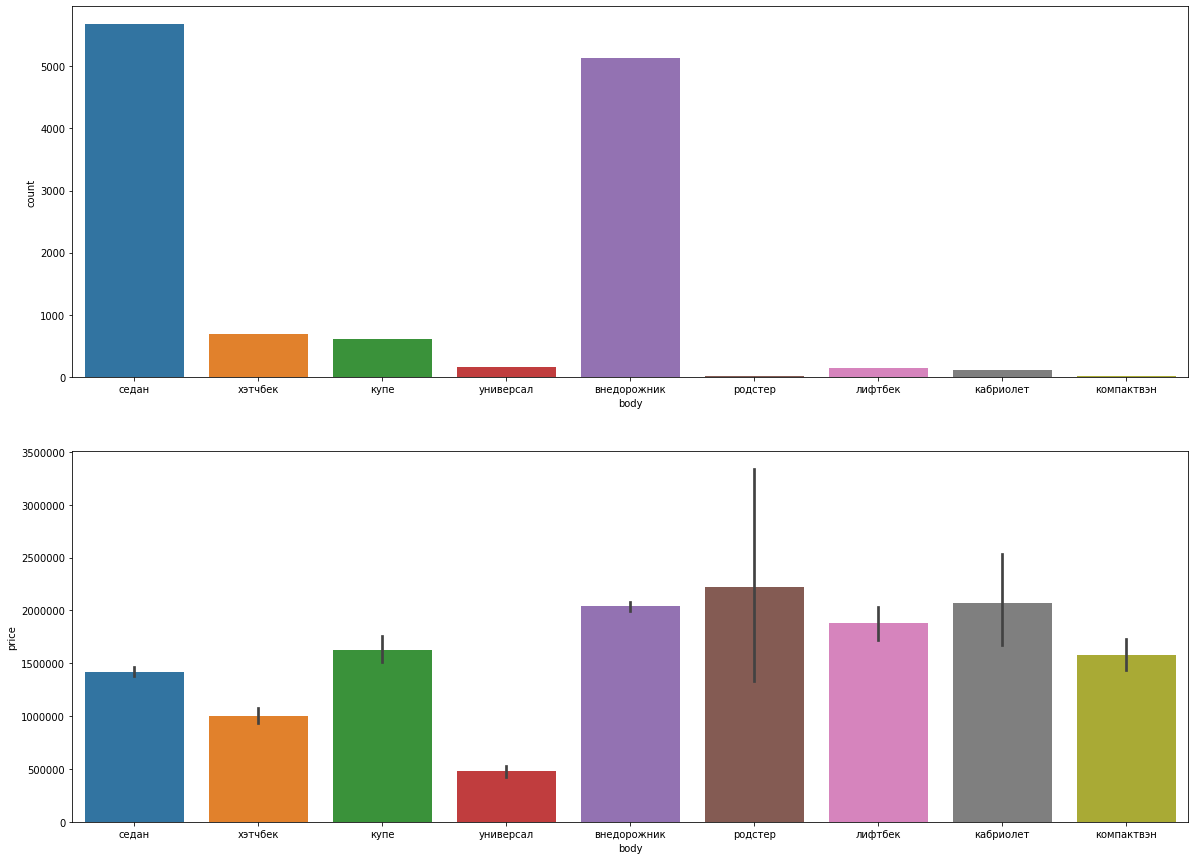

In [112]:
fig, axes = plt.subplots(2, figsize=(20,15))

sns.countplot(x='body', data=train, ax=axes[0])

sns.barplot(x='body', y='price', data=train, ax=axes[1])

In [113]:
def body(row):
    
    if row == 'седан':
        return 'body 1'
    
    elif row == 'купе':
        return 'body 1'
    
    elif row == 'компактвэн':
        return 'body 1'
    
    elif row == 'внедорожник':
        return 'body 2'
    
    elif row == 'родстер':
        return 'body 2'
    
    elif row == 'лифтбек':
        return 'body 2'
    
    elif row == 'кабриолет':
        return 'body 2'
    
    elif row == 'хэтчбек':
        return 'body 3'
    
    elif row == 'универсал':
        return 'body 4'
    
    else:
        return row
        
train['body'] = train['body'].apply(body)
test['body'] = test['body'].apply(body)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# color

In [114]:
display(train['color'].value_counts())
display(train['color'].nunique())
display(test['color'].value_counts())
test['color'].nunique()

чёрный         5007
белый          2201
серый          1605
синий          1582
серебристый     695
коричневый      457
красный         389
зелёный         183
бежевый         132
голубой         116
оранжевый        57
золотистый       56
пурпурный        51
фиолетовый       37
жёлтый           10
розовый           1
Name: color, dtype: int64

16

чёрный         1395
белый           767
синий           510
серый           453
коричневый      216
серебристый     191
красный         115
бежевый          46
голубой          35
зелёный          33
оранжевый        27
золотистый       23
пурпурный        20
фиолетовый        5
жёлтый            1
Name: color, dtype: int64

15

In [115]:
for idx in train[train['color']=='розовый'].index:
    train.drop(idx, inplace=True)
train = train.reset_index(drop=True)

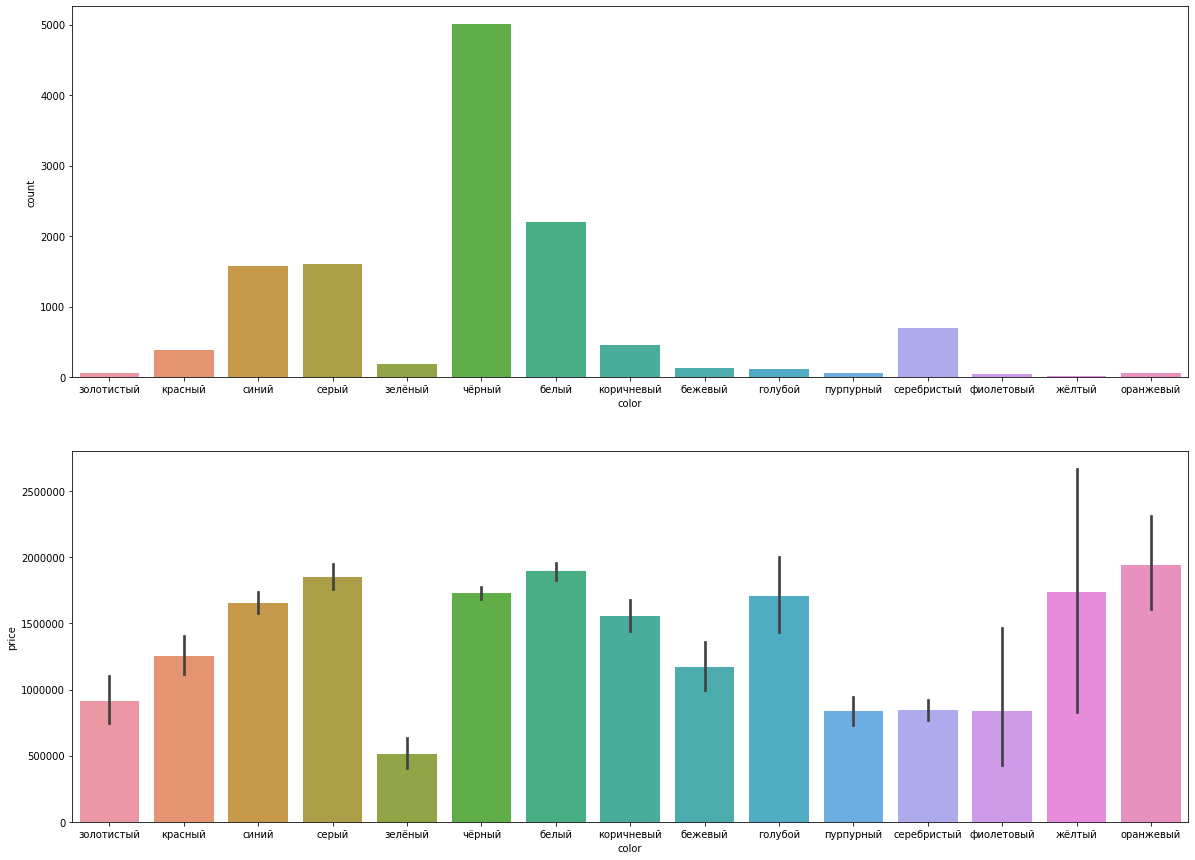

In [116]:
fig, axes = plt.subplots(2, figsize=(20,15))

sns.countplot(x='color', data=train, ax=axes[0])

sns.barplot(x='color', y='price', data=train, ax=axes[1])

In [117]:
def color(row):
    
    if row == 'синий' or row == 'серый' or row == 'чёрный' or row == 'белый' or row == 'голубой' or row == 'коричневый':
        return 'color 1'
    
    elif row == 'золотистый' or row == 'пурпурный' or row == 'серебристый' or row == 'фиолетовый':
        return 'color 2'
    
    elif row == 'красный' or row == 'бежевый':
        return 'color 3'
    
    elif row == 'жёлтый':
        return 'color 4'
    
    elif  row == 'зелёный':
        return 'color 5'

    elif row == 'оранжевый':
        return 'color 6'    
    
    else:
        return row
    
train['color'] = train['color'].apply(color)
test['color'] = test['color'].apply(color)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# fuel

In [118]:
display(train['fuel'].value_counts())
display(train['fuel'].nunique())
display(test['fuel'].value_counts())
test['fuel'].nunique()

бензин        8290
дизель        4224
гибрид          31
бензин-газ      21
электро         12
Name: fuel, dtype: int64

5

бензин     2471
дизель     1358
гибрид        7
электро       1
Name: fuel, dtype: int64

4

In [119]:
for idx in train[train['fuel']=='бензин-газ'].index:
    train.drop(idx, inplace=True)
train = train.reset_index(drop=True)

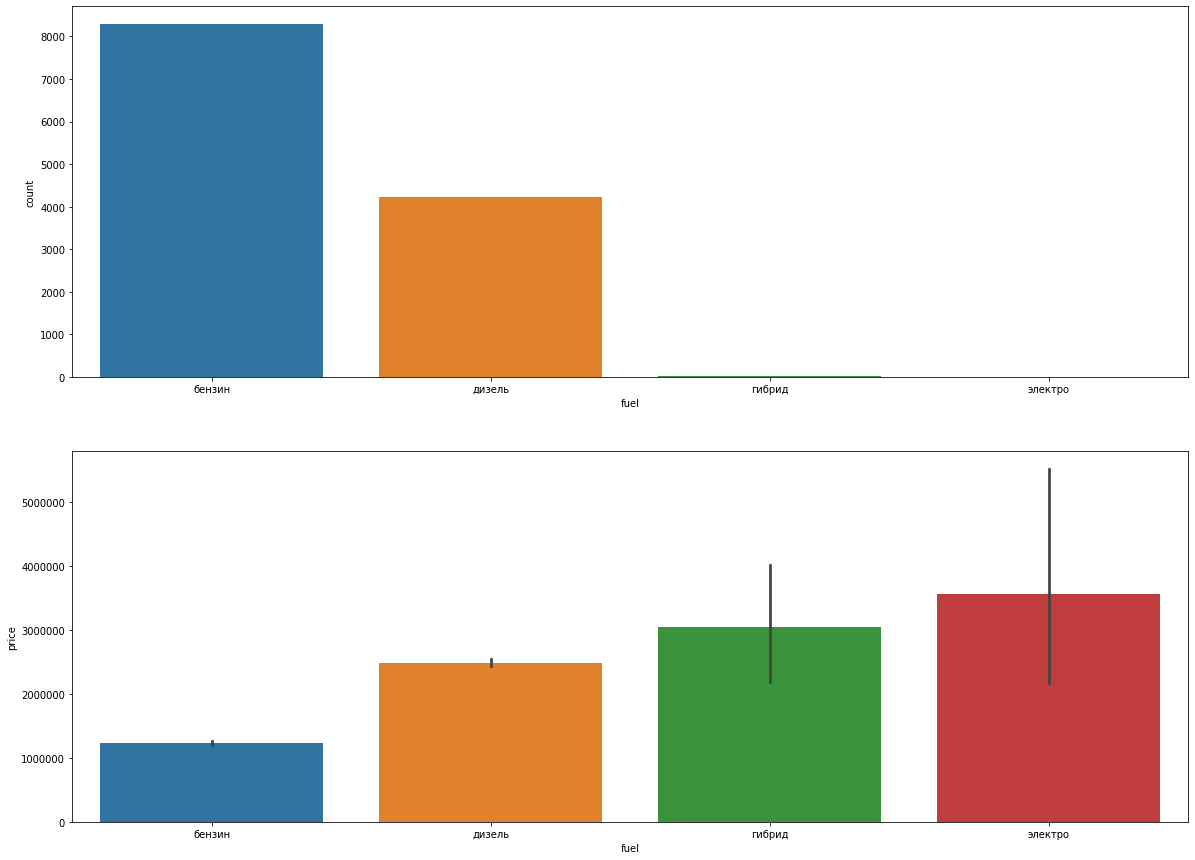

In [120]:
fig, axes = plt.subplots(2, figsize=(20,15))

sns.countplot(x='fuel', data=train, ax=axes[0])

sns.barplot(x='fuel', y='price', data=train, ax=axes[1])

# model_date

In [121]:
def stat(column):
    
    display(train[column].value_counts())
    display(train[column].nunique())
    display(test[column].value_counts())
    display(test[column].nunique())
    
    fig, axes = plt.subplots(2, figsize=(20,15))

    sns.countplot(x=column, data=train, ax=axes[0])
    sns.barplot(x=column, y='price', data=train, ax=axes[1])

2010    962
2013    960
2008    876
2011    765
2007    759
2017    737
2006    716
2018    674
2014    662
2015    657
2009    574
2003    562
2012    558
2005    445
2016    393
1995    352
2019    345
2001    246
1999    232
1998    203
2000    192
1990    138
2002    115
1987    114
1988     84
2004     53
1982     49
1994     48
1981     19
1986     18
1977     10
1976      7
1937      7
1975      6
1989      6
1949      3
1992      2
1966      2
1972      2
1965      2
1968      1
1936      1
Name: model_date, dtype: int64

42

2013    380
2011    373
2009    359
2010    308
2007    296
2015    285
2014    267
2012    215
2006    210
2008    191
2016    161
2018    125
2017    122
2005    116
2003     89
2002     54
2001     45
1995     44
1999     35
1998     33
2000     33
2019     26
1987     18
1990     13
2004     12
1982     11
1994      8
1981      3
1986      3
1977      1
1975      1
Name: model_date, dtype: int64

31

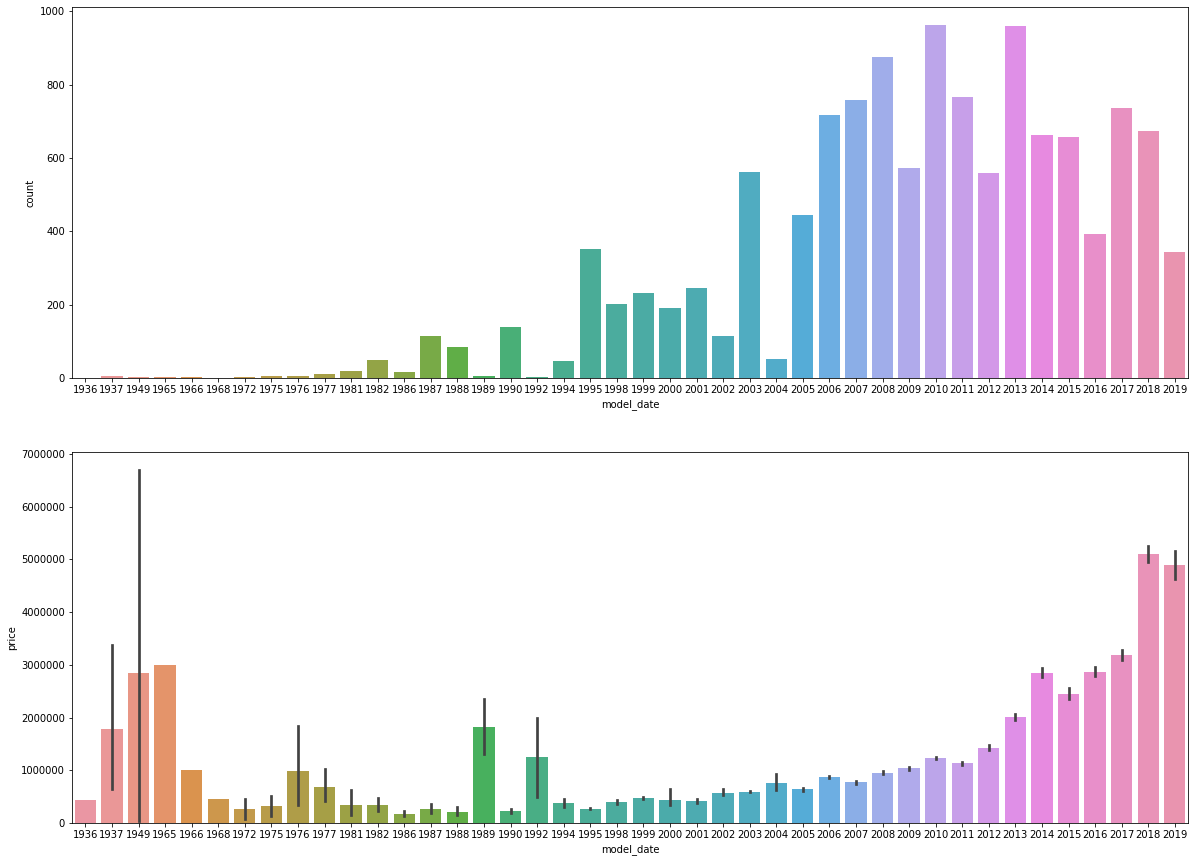

In [122]:
stat('model_date')

In [123]:
train['model_date'] = train['model_date'].apply(lambda x: 2014 if x==2104 else x)
train['model_date'] = train['model_date'].apply(lambda x: 2012 if x==2102 else x)

In [124]:
drop_list = []

for cat in train['model_date'].unique():
    if cat in test['model_date'].unique():
        continue
    else:
        drop_list.append(cat)
        
drop_list

[1976, 1972, 1937, 1936, 1968, 1966, 1949, 1992, 1988, 1965, 1989]

In [125]:
for date in drop_list:   
    for idx in train[train['model_date']==date].index:
        train.drop(idx, inplace=True)

train = train.reset_index(drop=True)

In [126]:
train['model_date'].dropna(inplace=True)

In [127]:
def model_date(row):
    
    if row == 2019 or row == 2018:
        return 'model date 1'
    
    elif row == 2017 or row == 2016 or row == 2014:
        return 'model date 2'
    
    elif row == 2010 or row == 2012:
        return 'model date 3'
    
    elif row == 2011 or row == 2009 or row == 2008 or row == 2006 or row == 2004  or row == 1977:
        return 'model date 4'
    
    elif row == 2007 or row == 2005 or row == 2003 or row == 2006 or row == 2002:
        return 'model date 5' 
    
    elif row == 2001 or row == 2000 or row == 1999 or row == 1998 or row == 1994 or row == 1987 or row == 1982 or row == 1981 or row == 1975:
        return 'model date 6'
    
    elif row == 1995 or row == 1990 or row == 1986:
        return 'model date 7'

    elif row == 2015:
        return 'model date 9'
    
    else:
        return 'model date 10'
    
train['model_date'] = train['model_date'].apply(model_date)
test['model_date'] = test['model_date'].apply(model_date)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# doors

5    6000
4    5569
2     745
3     126
Name: doors, dtype: int64

4

5    1963
4    1594
2     244
3      36
Name: doors, dtype: int64

4

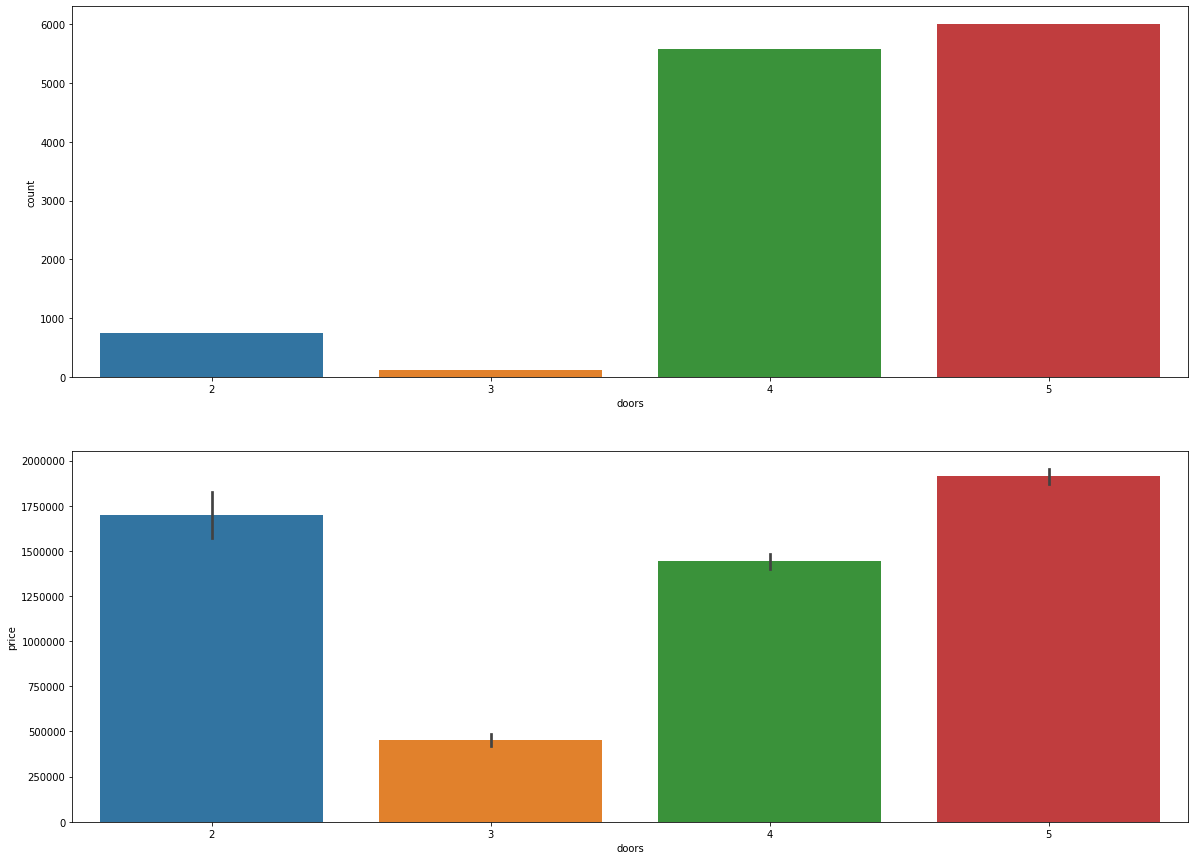

In [128]:
stat('doors')

# production_date

2020    1039
2013     982
2011     953
2012     948
2008     771
2019     666
2010     635
2014     631
2018     622
2017     597
2016     579
2009     540
2007     512
2015     483
2005     300
2004     295
2006     255
2001     230
2003     229
2002     223
1998     168
1999     147
1997     135
2000     134
1996      62
1993      39
1991      36
1994      35
1992      34
1990      30
1995      27
1988      18
1989      17
1987      13
1983      11
1984      10
1986      10
1985       9
1982       5
1980       4
1981       4
1978       2
Name: production_date, dtype: int64

42

2013    432
2012    386
2011    345
2014    312
2018    267
2019    262
2016    254
2015    229
2008    228
2010    205
2017    196
2007    149
2009    142
2005     63
2004     60
2006     52
2003     48
2002     41
2001     36
1998     22
2000     22
1999     20
1997     14
1996      9
1992      8
1995      6
1993      6
1989      6
1991      3
1984      3
1994      2
1990      2
1988      2
1982      2
1981      1
1987      1
1986      1
Name: production_date, dtype: int64

37

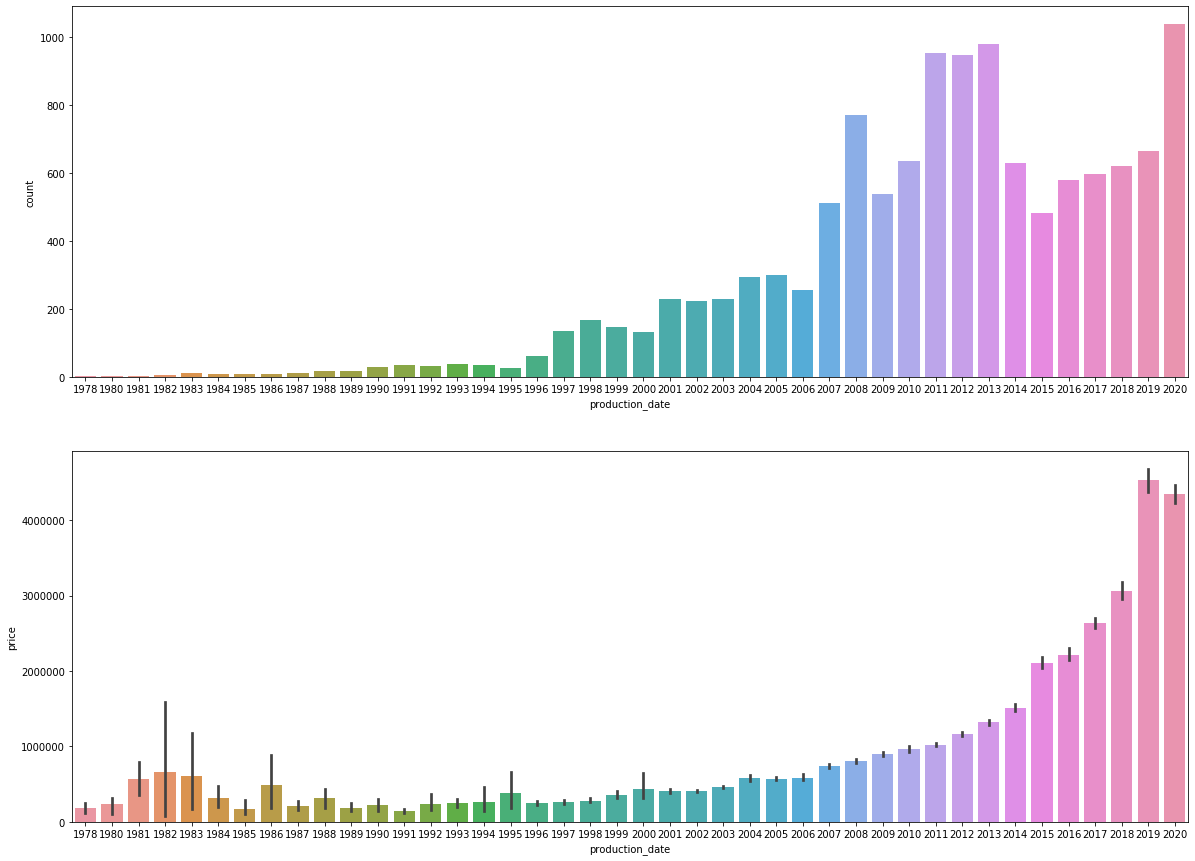

In [129]:
stat('production_date')

In [130]:
drop_list = []

for cat in train['production_date'].unique():
    if cat in test['production_date'].unique():
        continue
    else:
        drop_list.append(cat)
        
drop_list

[1985, 1983, 1980, 2020, 1978]

In [131]:
for date in drop_list:   
    for idx in train[train['production_date']==date].index:
        train.drop(idx, inplace=True)

train = train.reset_index(drop=True)

In [132]:
def drop_miss_value(df, column):
    
    drop_list = []

    for cat in df[column].unique():
        if cat in test[column].unique():
            continue
        else:
            drop_list.append(cat)
    print(drop_list)
            
    for date in drop_list:   
        for idx in df[df[column]==date].index:
            df.drop(idx, inplace=True)

    df = df.reset_index(drop=True)
    
    return df

# transmission

автоматическая      10513
механическая          732
роботизированная      130
Name: transmission, dtype: int64

3

автоматическая      3677
механическая         111
роботизированная      49
Name: transmission, dtype: int64

3

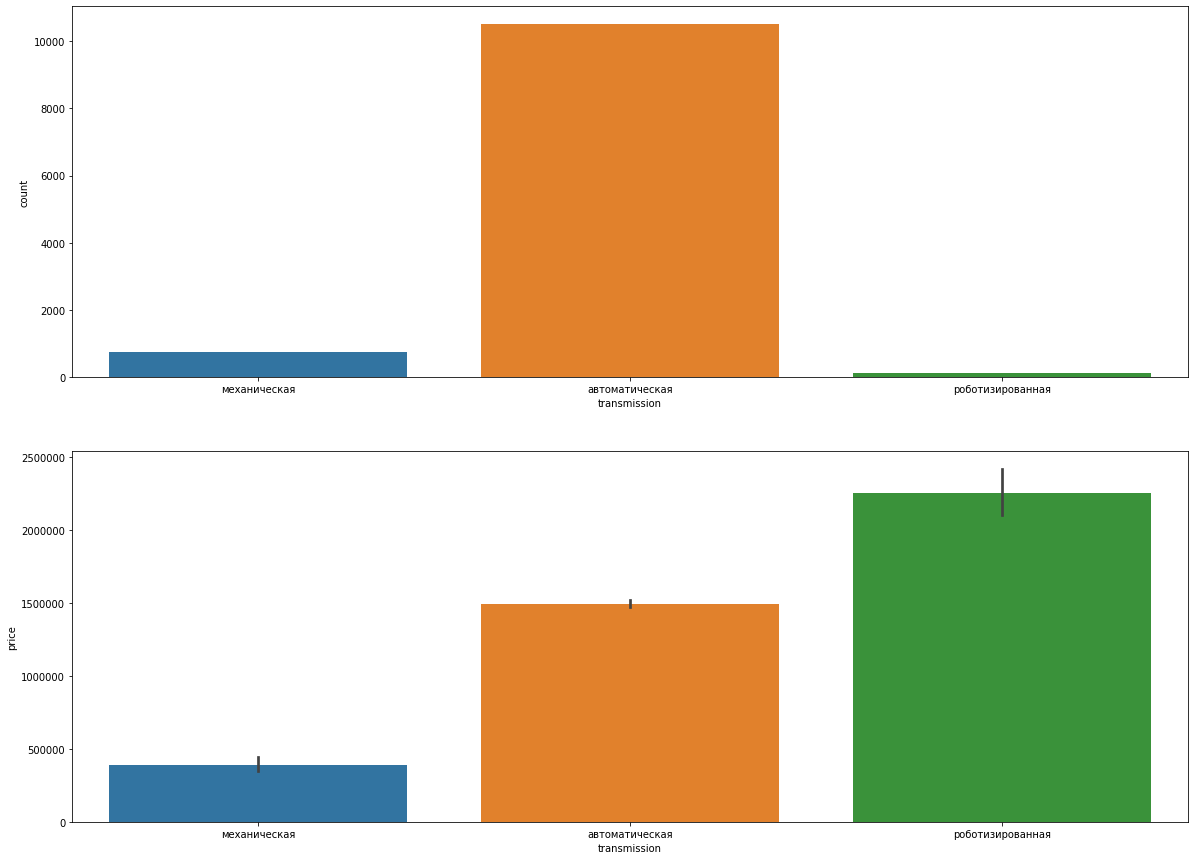

In [133]:
stat('transmission')

# engine_displacement

eng dis 1    5204
eng dis 2    4011
eng dis 4    1529
eng dis 5     383
eng dis 3     216
Name: engine_displacement, dtype: int64

5

eng dis 1    1724
eng dis 2    1559
eng dis 4     427
eng dis 3      70
eng dis 5      56
Name: engine_displacement, dtype: int64

5

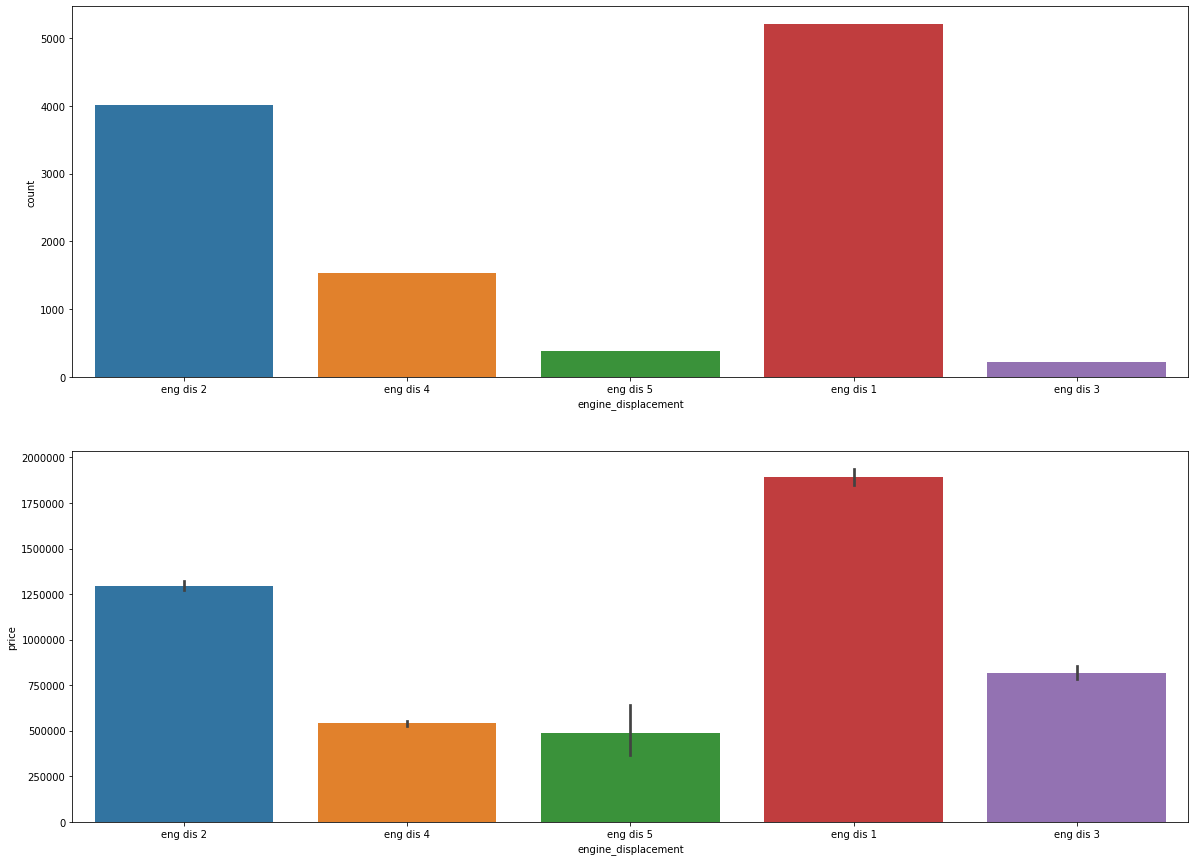

In [137]:
stat('engine_displacement')

In [135]:
train = drop_miss_value(train, 'engine_displacement')

[2.7, 1.7, 3.2, 2.4, 3.3, 4.9, 0.7, 0.6, 2.3, 0.0]


In [136]:
def engine_displacement(row):
    
    if row == 4.4 or row == 3.0 or row == 1.5:
        return 'eng dis 1'
    
    elif row == 6.0 or row == 5.0 or row == 4.0 or row == 2.0:
        return 'eng dis 2'
    
    elif row == 5.4 or row == 4.8:
        return 'eng dis 3'
    
    elif row == 4.6 or row == 2.9 or row == 3.5 or row == 3.6 or row == 2.5 or row == 1.6:
        return 'eng dis 4'    

    elif row == 2.2 or row == 2.8 or row == 3.4 or row == 1.9 or row == 1.8:
        return 'eng dis 5'    
    
    elif row == 6.6:
        return 'eng dis 5'
    
    else:
        return row
    
train['engine_displacement'] = train['engine_displacement'].apply(engine_displacement)
test['engine_displacement'] = test['engine_displacement'].apply(engine_displacement)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# engine_power

184    1362
306     793
249     763
218     734
190     695
245     691
150     505
136     485
231     485
170     349
407     327
258     322
272     291
192     272
115     231
286     209
156     199
235     194
320     189
177     188
313     161
555     155
355     130
450     127
204     106
193     103
575      86
333      83
381      75
340      72
143      67
326      65
264      65
367      58
265      55
400      53
118      41
163      40
102      37
140      33
560      32
129      32
507      29
420      29
113      28
625      27
105      23
360      20
445      19
211      18
530      17
122      13
347      13
300      12
116      12
100      11
462      10
188       9
197       8
269       8
431       8
544       7
609       6
90        6
329       5
370       5
238       5
510       5
600       4
125       4
362       4
234       3
374       2
460       2
233       2
230       2
171       1
252       1
480       1
75        1
610       1
449       1
187       1
Name

83

184    636
249    300
245    293
306    281
190    260
218    212
136    193
150    130
258    127
231     97
407     92
272     84
177     82
313     78
320     78
170     70
156     63
115     58
192     55
450     50
235     50
355     47
555     44
286     43
204     41
575     31
381     25
340     24
143     21
264     20
326     20
400     17
163     16
265     16
367     15
333     15
193     14
140     13
625     10
560     10
530      9
100      7
360      7
420      6
118      5
431      5
197      5
600      4
445      4
347      4
129      3
507      3
329      3
269      3
113      3
300      3
105      3
610      3
370      3
410      3
122      3
102      2
125      2
462      2
544      1
188      1
230      1
252      1
374      1
460      1
609      1
211      1
243      1
449      1
90       1
Name: engine_power, dtype: int64

75

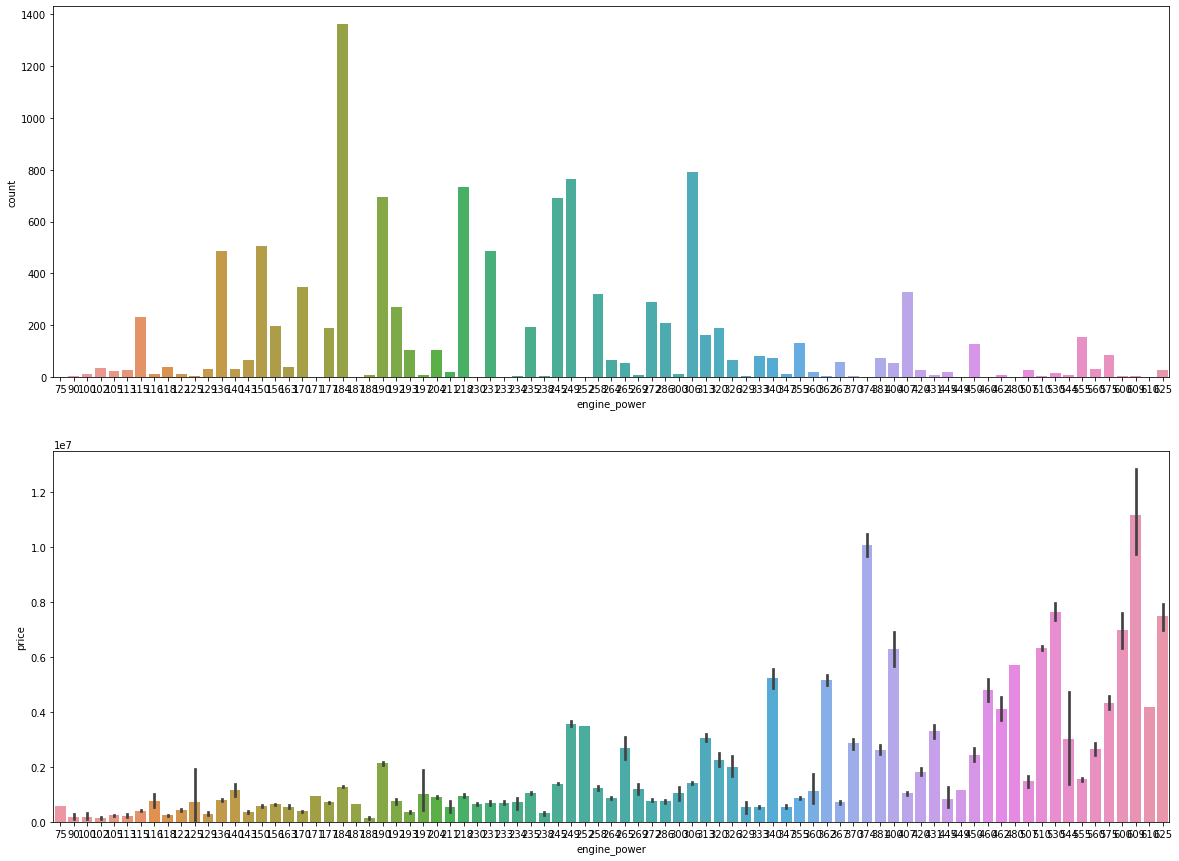

In [138]:
stat('engine_power')

In [139]:
train.dropna(inplace=True)
train

,test,style,body,color,fuel,model_date,doors,production_date,transmission,engine_displacement,engine_power,mileage,drive_type,wheel,condition,owners,vehicle_title,features,price,tax,tax_per_horse,days_in_use,mileage_per_day
0,0,520i,body 1,color 3,бензин,model date 6,4,1991,механическая,eng dis 2,129,300000.0,задний,Левый,Не требует ремонта,3,Оригинал,Unknown,60000.0,4515.0,35,10797,27.785496
1,0,316i,body 1,color 1,бензин,model date 7,4,1992,механическая,eng dis 4,102,300000.0,задний,Левый,Не требует ремонта,3,Дубликат,Unknown,68000.0,2550.0,25,10432,28.757669
2,0,318i,body 1,color 5,бензин,model date 7,4,1994,механическая,eng dis 5,115,350000.0,задний,Левый,Не требует ремонта,3,Дубликат,Unknown,70000.0,2875.0,25,9701,36.078755
3,0,520i,body 1,color 1,бензин,model date 6,4,1992,механическая,eng dis 2,150,100000.0,задний,Левый,Не требует ремонта,3,Оригинал,Unknown,70000.0,5250.0,35,10432,9.585890
4,0,520i,body 1,color 1,бензин,model date 6,4,1982,механическая,eng dis 2,125,250000.0,задний,Левый,Не требует ремонта,1,Оригинал,Unknown,70000.0,3125.0,25,14084,17.750639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6385,0,M50d,body 2,color 1,дизель,model date 1,5,2019,автоматическая,eng dis 1,400,32000.0,полный,Левый,Не требует ремонта,1,Оригинал,"'Тонированные стекла', 'Передний центральный п...",9150000.0,60000.0,150,570,56.140351
6386,0,1.5hyb,body 2,color 1,гибрид,model date 2,2,2018,автоматическая,eng dis 1,231,803.0,полный,Левый,Не требует ремонта,1,Оригинал,"'Круиз-контроль', 'Мультифункциональное рулево...",9690000.0,17325.0,75,935,0.858824
6387,0,1.5hyb,body 2,color 1,гибрид,model date 2,2,2019,автоматическая,eng dis 1,231,720.0,полный,Левый,Не требует ремонта,1,Оригинал,"'Круиз-контроль', 'Система «старт-стоп»', 'Про...",9990001.0,17325.0,75,570,1.263158
6388,0,M760Li xDrive,body 1,color 1,бензин,model date 1,4,2019,автоматическая,eng dis 5,609,8220.0,полный,Левый,Не требует ремонта,1,Оригинал,"'Круиз-контроль', 'Электрорегулировка руля', '...",11300000.0,91350.0,150,570,14.421053


# style

30d              395
520i             376
35i              303
320i             300
116i             195
318i             189
520d             181
4.4              173
525i             163
3.0i             161
20d              153
523i             129
530d xDrive      119
20d xDrive       115
320i xDrive      110
30i              105
18i              101
528i xDrive      100
40d              100
325i              95
20i xDrive        87
750Li xDrive      87
316i              84
3.0si             82
50i               80
20i               78
320d xDrive       78
520d xDrive       76
3.0d              68
530i              64
528i              63
48i               61
118i              60
25i               59
4.4i              58
320d              58
325xi             58
28i xDrive        49
M50d              47
25d               47
35d               47
730Ld xDrive      44
328i              40
525d xDrive       38
30d xDrive        35
28i               33
535i              33
525xi        

188

30d              255
35i              194
320i             171
520i             142
20d              134
530d xDrive      108
116i             102
520d              98
320d xDrive       95
320i xDrive       92
20d xDrive        92
318i              87
20i xDrive        81
40d               81
528i xDrive       79
18i               71
118i              66
20i               60
28i xDrive        58
523i              56
30i               56
525i              54
750Li xDrive      53
325i              53
316i              51
320d              42
50i               40
3.0i              39
520d xDrive       38
730Ld xDrive      38
3.0si             36
48i               34
325xi             34
3.0d              33
25i               32
28i               30
M50d              30
30d xDrive        29
4.4i              29
530i xDrive       27
25d               27
530i              27
528i              24
18d xDrive        21
35d               20
640i xDrive       18
328i              18
730d xDrive  

166

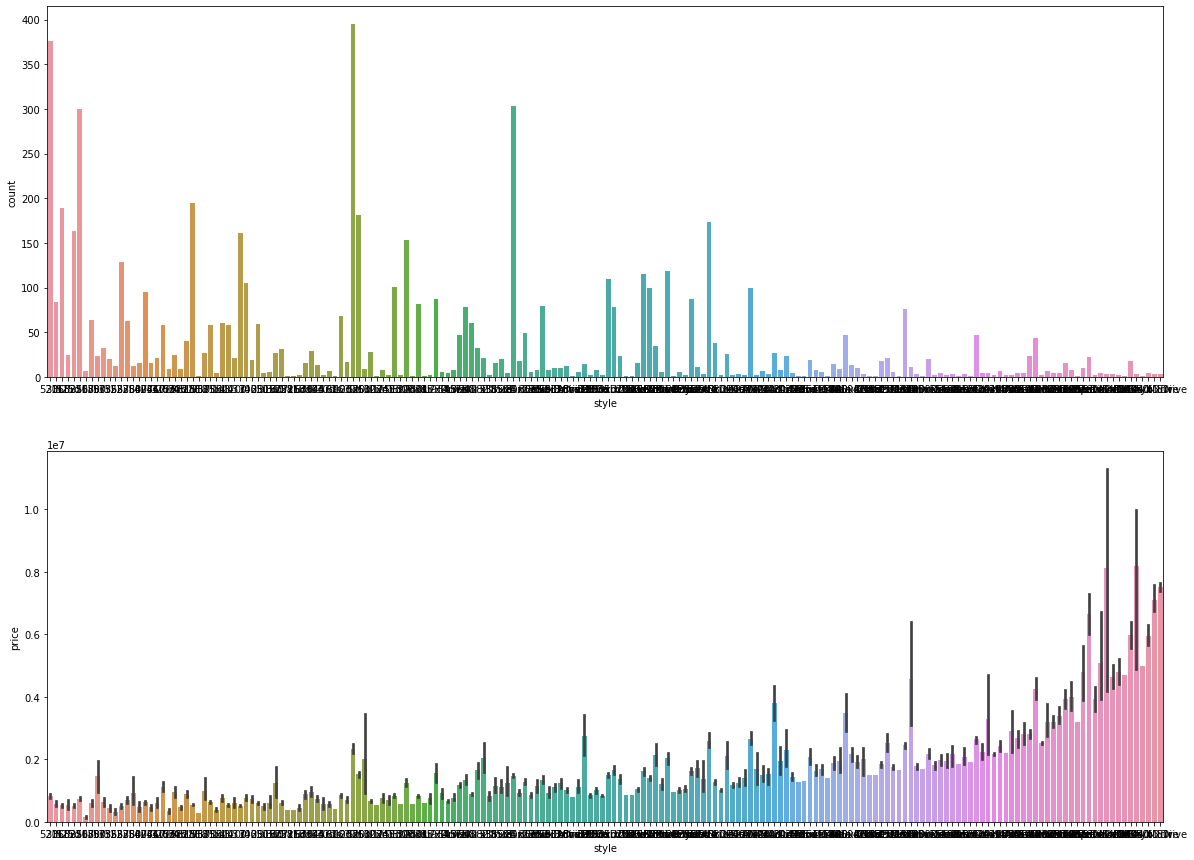

In [140]:
stat('style')

In [141]:
train = drop_miss_value(train, 'style')

['518i', '728Li', '725d', '123d', '745d', '320xd', '315', '1.9', '2.8', '3.0', '2.5', '2.0', '528Li', '5.0', '4.4', '216d', '740d', '220d', '535xi', '435i xDrive', 'M135i', '4.0', '218d', '535Li', '1.5', '2.0d', 'sDrive20i', '94Ah', '440i xDrive', '40e']


In [142]:
df = pd.concat([train, test])

In [143]:
df.to_csv('cars_new.csv', index=False)

In [145]:
test['style'].isna().value_counts()

False    3725
True      112
Name: style, dtype: int64